<p><a name="timeseries"></a></p>

# PRUEBAS DE NORMALIDAD

**Instalación y carga de las librerias requeridas**

In [ ]:
pip install yfinance

     |████████████████████████████████| 6.4 MB 34.2 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
# Módulo para manipular dataframes (tablas de datos) y realizar análisis de datos
import pandas as pd
# Modulo para utilizar funciones matemáticas, herramientas del álgebra lineal, etc
import numpy as np
# Modulo de descarga de datos de yahoo finance
import yfinance as yf
# Modulo para visualización de datos estadísticos
import seaborn as sns
# Modulo para utilizar herramientas estadísticas: distribuciones, estadísticas descriptivas, test estadísticos, etc.
import scipy.stats as scs
# Similar a scipy.stats
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<p><a name="timeseries"></a></p>

## Fuente de Datos

In [ ]:
# Descargar precios del S&P 500 de Yahoo Finance
df_sp500 = yf.download('^GSPC', start='2011-01-01', end='2021-12-31', progress=False)

## Análisis Exploratorio de los Datos

In [ ]:
# Visualizar las primeras 10 filas del dataframe
df_sp500.head(10) 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,1257.619995,1276.170044,1257.619995,1271.869995,1271.869995,4286670000
2011-01-04,1272.949951,1274.119995,1262.660034,1270.199951,1270.199951,4796420000
2011-01-05,1268.780029,1277.630005,1265.359985,1276.560059,1276.560059,4764920000
2011-01-06,1276.290039,1278.170044,1270.430054,1273.849976,1273.849976,4844100000
2011-01-07,1274.410034,1276.829956,1261.699951,1271.500000,1271.500000,4963110000
2011-01-10,1270.839966,1271.520020,1262.180054,1269.750000,1269.750000,4036450000
2011-01-11,1272.579956,1277.250000,1269.619995,1274.479980,1274.479980,4050750000
2011-01-12,1275.650024,1286.869995,1275.650024,1285.959961,1285.959961,4226940000
2011-01-13,1285.780029,1286.699951,1280.469971,1283.760010,1283.760010,4310840000


In [ ]:
# Visualizar las ultimas 10 filas del dataframe:
df_sp500.tail(10) 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-16,4719.129883,4731.990234,4651.890137,4668.669922,4668.669922,3592810000
2021-12-17,4652.500000,4666.700195,4600.220215,4620.640137,4620.640137,5609780000
2021-12-20,4587.899902,4587.899902,4531.100098,4568.020020,4568.020020,3395780000
2021-12-21,4594.959961,4651.140137,4583.160156,4649.229980,4649.229980,2564370000
2021-12-22,4650.359863,4697.669922,4645.529785,4696.560059,4696.560059,2439570000
2021-12-23,4703.959961,4740.740234,4703.959961,4725.790039,4725.790039,2194630000
2021-12-27,4733.990234,4791.490234,4733.990234,4791.189941,4791.189941,2264120000
2021-12-28,4795.490234,4807.020020,4780.040039,4786.350098,4786.350098,2217050000
2021-12-29,4788.640137,4804.060059,4778.080078,4793.060059,4793.060059,2369370000


In [ ]:
# Tamaño del dataframe, dimensiones
df_sp500.shape

(2768, 6)

In [ ]:
# Resumen del dataframe
df_sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2768 entries, 2011-01-03 to 2021-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2768 non-null   float64
 1   High       2768 non-null   float64
 2   Low        2768 non-null   float64
 3   Close      2768 non-null   float64
 4   Adj Close  2768 non-null   float64
 5   Volume     2768 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 151.4 KB


In [ ]:
# Tipos de datos en cada columna
df_sp500.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
# Columnas del data frame (variables)
df_sp500.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
# Estadísticas descriptivas
df_sp500.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2.768000e+03
mean,2361.016466,2372.836109,2348.389849,2361.595772,2361.595772,3.757634e+09
std,858.980614,862.817328,855.159636,859.284167,859.284167,9.120889e+08
min,1097.420044,1125.119995,1074.770020,1099.229980,1099.229980,1.025000e+09
25%,1700.332489,1707.794983,1694.497528,1702.859955,1702.859955,3.225570e+09
50%,2123.404907,2130.660034,2115.059937,2125.030029,2125.030029,3.590190e+09
75%,2842.370056,2857.172424,2825.419922,2843.802490,2843.802490,4.096272e+09
max,4795.490234,4808.930176,4780.040039,4793.060059,4793.060059,9.878040e+09


In [ ]:
# Descargar un portafolio de acciones
df_port = yf.download(['CL=F', 'AAPL', 'BRK-B'], start='2011-01-01', end='2021-12-31', progress=False)

In [ ]:
df_port.head(10)

Adj Close                            Close                        \
                 AAPL      BRK-B       CL=F       AAPL      BRK-B       CL=F   
Date                                                                           
2011-01-03  10.078654  80.410004  91.550003  11.770357  80.410004  91.550003   
2011-01-04  10.131256  80.169998  89.379997  11.831786  80.169998  89.379997   
2011-01-05  10.214128  80.910004  90.300003  11.928571  80.910004  90.300003   
2011-01-06  10.205873  80.370003  88.379997  11.918929  80.370003  88.379997   
2011-01-07  10.278962  79.739998  88.029999  12.004286  79.739998  88.029999   
2011-01-10  10.472544  79.650002  89.250000  12.230357  79.650002  89.250000   
2011-01-11  10.447773  79.400002  91.110001  12.201429  79.400002  91.110001   
2011-01-12  10.532787  80.739998  91.860001  12.300714  80.739998  91.860001   
2011-01-13  10.571319  80.760002  91.400002  12.345714  80.760002  91.400002   
2011-01-14  10.656947  81.650002  91.540001  12.445714  81.650002  91.540001   

                 High                              Low                        \
                 AAPL      BRK-B       CL=F       AAPL      BRK-B       CL=F   
Date                                                                           
2011-01-03  11.795000  80.839996  92.580002  11.601429  80.220001  91.209999   
2011-01-04  11.875000  80.389999  92.070000  11.719643  79.720001  88.360001   
2011-01-05  11.940714  80.910004  90.839996  11.767857  79.800003  88.099998   
2011-01-06  11.973214  80.980003  90.709999  11.889286  80.370003  87.849998   
2011-01-07  12.012500  80.699997  89.480003  11.853571  79.500000  87.250000   
2011-01-10  12.258214  79.970001  89.980003  12.041786  79.139999  88.129997   
2011-01-11  12.320000  80.019997  91.389999  12.123929  79.209999  88.930000   
2011-01-12  12.301071  80.739998  92.389999  12.214286  79.709999  90.790001   
2011-01-13  12.380000  80.889999  92.370003  12.280357  80.290001  90.750000   
2011-01-14  12.445714  81.669998  91.690002  12.301429  80.580002  90.099998   

                 Open                             Volume                       
                 AAPL      BRK-B       CL=F         AAPL      BRK-B      CL=F  
Date                                                                           
2011-01-03  11.630000  80.500000  91.309998  445138400.0  5573500.0  225189.0  
2011-01-04  11.872857  80.330002  91.500000  309080800.0  4020400.0  415521.0  
2011-01-05  11.769643  79.989998  89.290001  255519600.0  4107800.0  416908.0  
2011-01-06  11.954286  80.930000  90.470001  300428800.0  3938000.0  440456.0  
2011-01-07  11.928214  80.610001  88.180000  311931200.0  3809600.0  444813.0  
2011-01-10  12.101071  79.519997  89.000000  448560000.0  3521800.0  430277.0  
2011-01-11  12.317143  79.690002  89.309998  444108000.0  3481400.0  429761.0  
2011-01-12  12.258929  79.919998  91.180000  302590400.0  5436500.0  382686.0  
2011-01-13  12.327143  80.730003  92.000000  296780400.0  3303800.0  358898.0  
2011-01-14  12.353214  80.629997  90.989998  308840000.0  4786900.0  313331.0

In [ ]:
df_port.describe()

Adj Close                                  Close               \
              AAPL        BRK-B         CL=F         AAPL        BRK-B   
count  2768.000000  2768.000000  2767.000000  2768.000000  2768.000000   
mean     43.891699   159.105766    68.431330    45.716462   159.105766   
std      38.824122    58.064472    23.073148    38.281633    58.064472   
min       9.642876    66.000000   -37.630001    11.261429    66.000000   
25%      17.746140   114.895000    49.494999    20.457232   114.895000   
50%      27.510270   146.695000    62.939999    29.815000   146.695000   
75%      49.731989   203.245003    92.495003    51.013751   203.245003   
max     180.100540   300.170013   113.930000   180.330002   300.170013   

                           High                                    Low  \
              CL=F         AAPL        BRK-B         CL=F         AAPL   
count  2767.000000  2768.000000  2768.000000  2767.000000  2768.000000   
mean     68.431330    46.168137   160.119126    69.397185    45.224235   
std      23.073148    38.700666    58.472671    23.029627    37.809505   
min     -37.630001    11.346429    66.660004    13.690000    11.089286   
25%      49.494999    20.658928   115.489998    50.275000    20.353125   
50%      62.939999    29.981250   147.470001    63.639999    29.561250   
75%      92.495003    51.439375   204.837502    93.389999    50.568125   
max     113.930000   182.130005   301.649994   114.830002   178.529999   

                                        Open                            \
             BRK-B         CL=F         AAPL        BRK-B         CL=F   
count  2768.000000  2767.000000  2768.000000  2768.000000  2767.000000   
mean    158.010936    67.411771    45.691126   159.134696    68.455222   
std      57.663837    23.013334    38.243650    58.086991    23.027598   
min      65.349998   -40.320000    11.310000    65.919998   -14.000000   
25%     114.197498    48.674999    20.518036   114.857500    49.490000   
50%     145.805000    61.889999    29.756250   146.614998    62.830002   
75%     201.532497    91.260002    50.934374   203.092499    92.440002   
max     299.739990   112.250000   181.119995   300.880005   113.889999   

             Volume                              
               AAPL         BRK-B          CL=F  
count  2.768000e+03  2.768000e+03  2.767000e+03  
mean   2.403769e+08  4.261698e+06  4.319243e+05  
std    1.969997e+08  2.044439e+06  2.212055e+05  
min    4.100000e+07  6.720000e+04  4.851600e+04  
25%    1.061621e+08  3.056225e+06  2.613160e+05  
50%    1.666698e+08  3.765900e+06  3.823340e+05  
75%    3.132745e+08  4.793075e+06  5.782545e+05  
max    1.880998e+09  2.229380e+07  2.288230e+06

In [ ]:
df_port.columns

MultiIndex([('Adj Close',  'AAPL'),
            ('Adj Close', 'BRK-B'),
            ('Adj Close',  'CL=F'),
            (    'Close',  'AAPL'),
            (    'Close', 'BRK-B'),
            (    'Close',  'CL=F'),
            (     'High',  'AAPL'),
            (     'High', 'BRK-B'),
            (     'High',  'CL=F'),
            (      'Low',  'AAPL'),
            (      'Low', 'BRK-B'),
            (      'Low',  'CL=F'),
            (     'Open',  'AAPL'),
            (     'Open', 'BRK-B'),
            (     'Open',  'CL=F'),
            (   'Volume',  'AAPL'),
            (   'Volume', 'BRK-B'),
            (   'Volume',  'CL=F')],
           )

In [ ]:
AAPL = df_port.loc[:, [('Adj Close', 'AAPL')]]

In [ ]:
AAPL.columns

MultiIndex([('Adj Close', 'AAPL')],
           )

In [ ]:
AAPL.head(10)

,Adj Close
,AAPL
Date,
2011-01-03,10.078654
2011-01-04,10.131257
2011-01-05,10.214130
2011-01-06,10.205873
2011-01-07,10.278964
2011-01-10,10.472542
2011-01-11,10.447772
2011-01-12,10.532786


In [ ]:
AAPL.rename(columns={'Adj Close': 'adj_close'}, inplace=True)

In [ ]:
AAPL.head(10)

,adj_close
,AAPL
Date,
2011-01-03,10.078654
2011-01-04,10.131256
2011-01-05,10.214128
2011-01-06,10.205873
2011-01-07,10.278962
2011-01-10,10.472544
2011-01-11,10.447773
2011-01-12,10.532787


In [ ]:
# Agregar al dataframe AAPL la columna de retornos simples y retornos logaritmicos
AAPL['simple_rtn'] = AAPL.adj_close.pct_change() 
# Agregar al dataframe AAPL la columna de retornos logaritmicos
AAPL['log_rtn'] = np.log(AAPL.adj_close/AAPL.adj_close.shift(1))

In [ ]:
AAPL.head(10)

,adj_close,simple_rtn,log_rtn
,AAPL,,
Date,,,
2011-01-03,10.078654,NaN,NaN
2011-01-04,10.131256,0.005219,0.005206
2011-01-05,10.214128,0.008180,0.008147
2011-01-06,10.205873,-0.000808,-0.000809
2011-01-07,10.278962,0.007162,0.007136
2011-01-10,10.472544,0.018833,0.018658
2011-01-11,10.447773,-0.002365,-0.002368
2011-01-12,10.532787,0.008137,0.008104


In [ ]:
# Borrar NaN en la primera fila
AAPL.dropna(how='any', inplace = True)

In [ ]:
AAPL.head(10)

,adj_close,simple_rtn,log_rtn
,AAPL,,
Date,,,
2011-01-04,10.131257,0.005219,0.005206
2011-01-05,10.214130,0.008180,0.008147
2011-01-06,10.205873,-0.000808,-0.000809
2011-01-07,10.278964,0.007162,0.007136
2011-01-10,10.472542,0.018832,0.018657
2011-01-11,10.447772,-0.002365,-0.002368
2011-01-12,10.532786,0.008137,0.008104
2011-01-13,10.571319,0.003658,0.003652


In [ ]:
# Función para cacular momentos de una base de datos a1

def print_statistics(a1):
  ''' Print selected statistics.

  Parameters
  ==========
  a1: ndarray object
  '''
  sta1 = scs.describe(a1)
  print('%14s %14s' % ('statistic', 'dataframe1'))
  print(30 * "-")
  print('%14s %14.3f' % ('size', sta1[0]))
  print('%14s %14.3f' % ('min', sta1[1][0]))
  print('%14s %14.3f' % ('max', sta1[1][1]))
  print('%14s %14.3f' % ('mean', sta1[2]))
  print('%14s %14.3f' % ('std', np.sqrt(sta1[3])))
  print('%14s %14.3f' % ('skew', sta1[4]))
  print('%14s %14.3f' % ('kurtosis', sta1[5]))

In [ ]:
print_statistics(AAPL.log_rtn)

     statistic     dataframe1
------------------------------
          size       2766.000
           min         -0.138
           max          0.113
          mean          0.001
           std          0.018
          skew         -0.341
      kurtosis          6.438


## VISUALIZACIÓN

In [ ]:
# Modulo de gráficación estilo MatLab (pyplot)
import matplotlib.pyplot as plt
# Estilo de gráficas
plt.style.use('seaborn-colorblind')
# Fijar la resolución de la gráfica
plt.rcParams['figure.dpi'] = 300
# Para que la gráfica se generé exactamente debajo del código:
%matplotlib inline

In [ ]:
# Generación de números aleatorios

import numpy.random as npr

# Fijar el valor de la semilla para que los resultados se puedan replicar
npr.seed(100)
# Fijar el numero de digitos para las salidas
np.set_printoptions(precision=4)

In [ ]:
# Datos

# tamaño de la muestra
sample_size = 1000
# media
mu1 = 100
# desviación
sigma1 = 20
# Números aleatorios de una distribución normal
rn1 = npr.normal(mu1, sigma1, sample_size)

In [ ]:
rn1.mean()

99.66455685312181

In [ ]:
rn1.std()

20.916854388333995

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


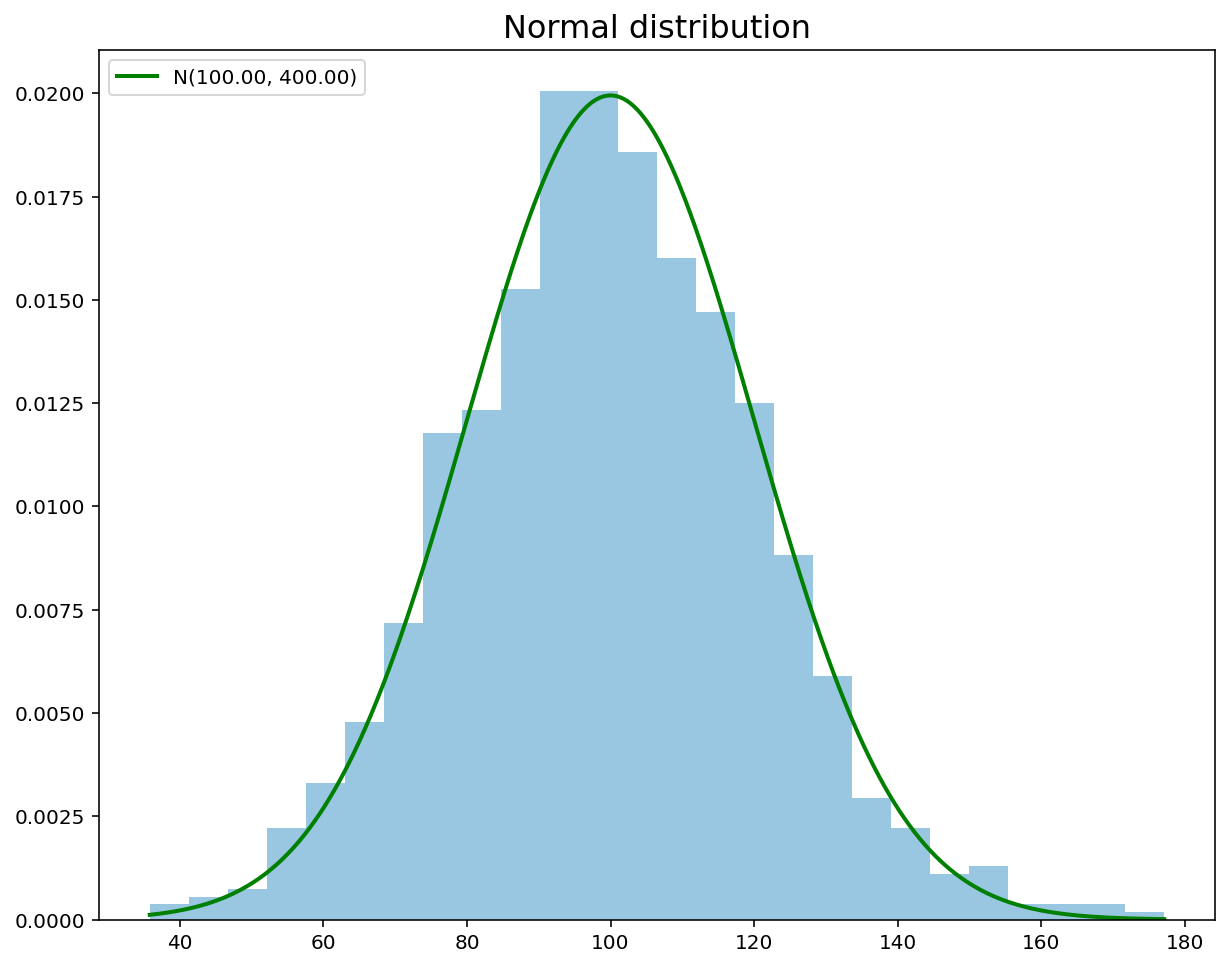

In [ ]:
# Grafica

# Generación de la distribución normal
r_range1 = np.linspace(rn1.min(), rn1.max(), num=sample_size)
norm_pdf1 = scs.norm.pdf(r_range1, loc=mu1, scale=sigma1)

fig, ax = plt.subplots(1,1, figsize=(10,8))
# Histograma
sns.distplot(rn1, kde=False, norm_hist=True, ax=ax)
ax.set_title('Normal distribution', fontsize=16)
# Densidad de una normal
ax.plot(r_range1, norm_pdf1, 'g', lw=2, label=f'N({mu1:.2f}, {sigma1**2:.2f})')
ax.legend(loc='upper left');
# Guardar la imagen
# plt.savefig('norm_dist.png')
# plt.savefig('norm_dist.pdf')

In [ ]:
print_statistics(rn1)

     statistic     dataframe1
------------------------------
          size       1000.000
           min         35.801
           max        177.159
          mean         99.665
           std         20.927
          skew          0.132
      kurtosis          0.218


## TEST DE NORMALIDAD

In [ ]:
# Jarque-Bera
# Ideal tener mas de 2000 datos muestrales

# The Jarque-Bera test, tests whether the sample data has the skewness and kurtosis matching a normal distribution.
# H0: La distribución de los datos es normal

stat, p = scs.jarque_bera(rn1)
print('stat=%.3f, p=%.3f\n' % (stat, p))
if p > 0.05:
  print('Probably Gaussian')
else:
  print('Probably not Gaussian')

stat=4.884, p=0.087

Probably Gaussian


In [ ]:
# Anderson-Darling

# Compara qué tanto la distribución acumulada de los datos se desvía de la distribución acumulada de la normal.

# H0: La distribución de los datos es normal
# If the returned statistic is larger than these critical values then
# for the corresponding significance level, the null hypothesis that
# the data come from the chosen distribution can be rejected.

result = scs.anderson(rn1)
print('stat=%.3f' % (result.statistic))
for i in range (len(result.critical_values)):
  sig_lev, crit_val = result.significance_level[i], result.critical_values[i]
  if result.statistic < crit_val:
    print(f'Probably Gaussian: {crit_val} critical value at {sig_lev} level of significance')
  else:
    print(f'Probably not Gaussian: {crit_val} critical value at {sig_lev} level of significance')

stat=0.279
Probably Gaussian: 0.574 critical value at 15.0 level of significance
Probably Gaussian: 0.653 critical value at 10.0 level of significance
Probably Gaussian: 0.784 critical value at 5.0 level of significance
Probably Gaussian: 0.914 critical value at 2.5 level of significance
Probably Gaussian: 1.088 critical value at 1.0 level of significance


In [ ]:
# Kolmogorov-Smirnov

# Compara qué tanto la distribución acumulada se desvía de la distribución acumulada de la normal.
# H0: La distribución de los datos es normal

stat, p = scs.kstest(rn1, 'norm')
print('stat=%.3f, p=%.3f\n' % (stat, p))
if p > 0.05:
  print('Probably Gaussian')
else:
  print('Probably not Gaussian')

stat=1.000, p=0.000

Probably not Gaussian


In [ ]:
# D'Agostino-Pearson (scs.normaltest)

# The test is based on transformations of the sample kurtosis and skewness

# H0: La distribución de los datos es normal

stat, p = scs.normaltest(rn1)
print('stat=%.3f, p=%.3f\n' % (stat, p))
if p > 0.05:
  print('Probably Gaussian')
else:
  print('Probably not Gaussian')

stat=4.885, p=0.087

Probably Gaussian


In [ ]:
# Shapiro-Wilk

stat, p = scs.shapiro(rn1)
print('stat=%.3f, p=%.3f\n' % (stat, p))
if p > 0.05:
  print('Probably Gaussian')
else:
  print('Probably not Gaussian')

In [ ]:
# Chi-Square

stat, p = scs.chisquare(rn1)
print('stat=%.3f, p=%.3f\n' % (stat, p))
if p > 0.05:
  print('Probably Gaussian')
else:
  print('Probably not Gaussian')